# Python challenges
https://pythonprinciples.com/challenges/Middle-letter/

In [ ]:
# Capital indexes
def capital_indexes(Str):
        Isupper = []
        for i in range(0,len(Str)):
            if Str[i].isupper():
                Isupper.append(i)
            
        return Isupper
        
capital_indexes('HeLlO')

In [ ]:
# Middle letter
def mid(Str):
    half_length = len(Str)/2
    if  half_length == 0.5 or half_length == 0:
        mid_letter = Str

    elif 2 % half_length != 0:
        letter_index = int(half_length - 0.5)
        mid_letter = Str[letter_index]
        
    else:
        mid_letter = ''
    return mid_letter


print(mid(''))
print(mid('a'))
print(mid('abc'))
print(mid('aaaa'))


# # this approach uses // which is integer division in Python 3
# # alternatively, use / and int() in combination.
# def mid(string):
#     if len(string) % 2 == 0:
#         return ''
#     return string[len(string)//2]       # // rounds down    
#     # retunr string[-len(string)//2]      # to round up




In [20]:
# Online status
def online_count(statuses):
    count = 0
    for isonline in statuses.values():
        if isonline == 'online':
            count += 1
    return count

# # short version
# def online_count(people):
#     return len([p for p in people if people[p] == 'online'])

statuses = {
    'Alice': 'online',
    'Bob': 'offline',
    'Eve': 'online',
}
online_count(statuses)

2

In [35]:
# Randomness
from random import randint

def random_number():
    return randint(1,100)

random_number()

96

In [42]:
#type check
def only_ints(input1,input2):
    return type(input1) == int and type(input2) == int
only_ints(1,'a')

False

In [58]:
# Double letters
def double_letters(Str):
    previous_letter = ''
    for current_letter in Str:
        if current_letter == previous_letter:
            return True
        else:
            previous_letter = current_letter

    return False


def double_letters(string):
    return any([a == b for a, b in zip(string, string[1:])])

string = 'Helol'
double_letters(string)

x = list(zip(string, string[2:]))  # to understand what zip does
print(x)



False

In [26]:
# Thousands separator	7 / 10
def format_number(N):

    N_str = str(round(N))[::-1]
    n = 3
    sub_string = ','.join([N_str[i:i+n] for i in range(0, len(N_str), n)])[::-1]

    return sub_string

# built-in solution
def format_number(n):
    return '{:,}'.format(n)
    'basilio {:,.1000f}'.format(90000.000010) # example of format function

format_number(10000)

'-2'

In [5]:
# Counting parameters
def param_count(*argv):
    return len(argv)

param_count(1,2,3)  

3

In [14]:
# List xor
def list_xor(n,list1,list2):
    if list1.count(n) and list2.count(n):
        return False
    elif list1.count(n)==0 and list2.count(n)==0:
        return False
    else:
        return True


def list_xor(n, list1, list2):
    return (n in list1) ^ (n in list2)

list_xor(1, [1, 2, 3], [4, 5, 6])

True

In [ ]:
# create gantt chart - https://towardsdatascience.com/gantt-charts-with-pythons-matplotlib-395b7af72d72

def install_dependencies():
    import subprocess
    import sys
    import pkg_resources

    Packages = ['numpy','pandas','matplotlib','jupyter','openpyxl']
    installed_packages = pkg_resources.working_set
    installed_packages_list = sorted(['%s==%s' % (i.key, i.version) for i in installed_packages])
    for pkg in Packages:
        if any(pkg in s for s in installed_packages_list):
            print(pkg + ' already installed')
        else:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

install_dependencies()
current_script_path = os.getcwd()
df = pd.read_excel(current_script_path + '\\plan.xlsx')

# project start date
proj_start = df.Start.min()
# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# show figure
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num)
plt.show()


In [20]:

# # create a column with the color for each department
# def color(row):
#     c_dict = {'Admin':'#E64646', 'Data collection':'#E69646', 'Data analysis':'#34D05C'}
#     return c_dict[row['Department']]
# df['color'] = df.apply(color, axis=1)







{'Admin': '#E64646', 'Data collection': '#E69646', 'Data analysis': '#34D05C'}

AttributeError: 'DataFrame' object has no attribute 'color'

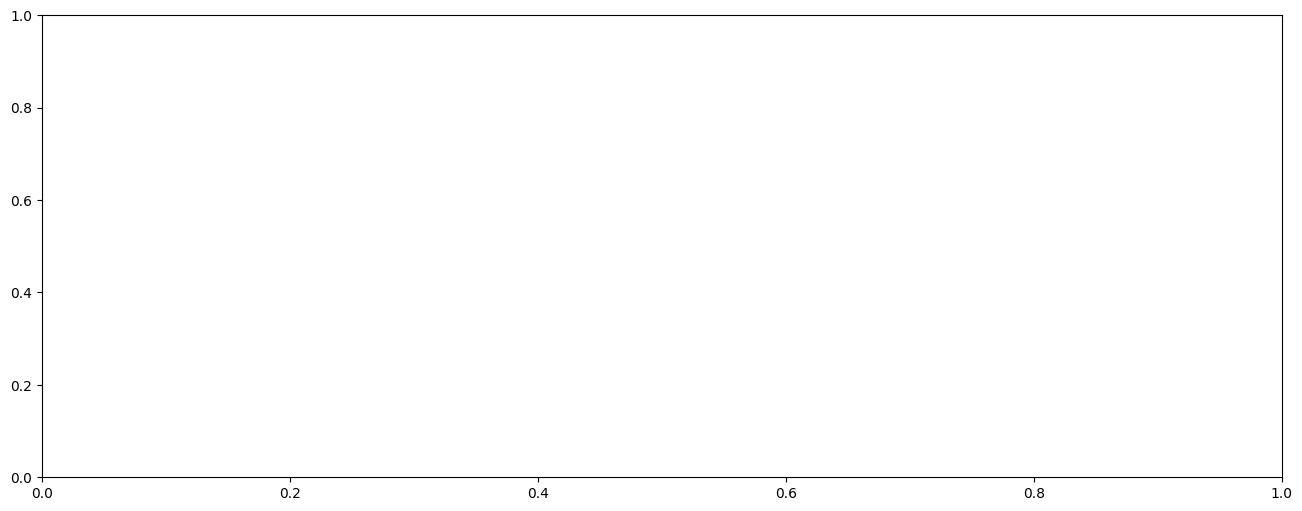

In [15]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color)
##### LEGENDS #####
c_dict = {'Admin':'#E64646', 'Data collection':'#E69646', 'Data analysis':'#34D05C'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
plt.show()

In [11]:
df


,Task,Department,Start,End,Completion,start_num,end_num,days_start_to_end
0,Arnold Baca,Admin,2022-10-27,2023-05-20,0,26,231,205
1,Rene Baumgartner,Data collection,2022-10-10,2023-02-15,0,9,137,128
2,Jonas Bischofberger,Data analysis,2022-10-24,2022-12-28,0,23,88,65
3,Amin Chetouani,Admin,2022-10-30,2023-04-03,0,29,184,155
4,David Deimel,Data collection,2022-10-25,2023-04-01,0,24,182,158
5,Reinhard Edelmoser,Data analysis,2022-11-17,2023-03-17,0,47,167,120
6,Johannes Eichwalder,Admin,2022-11-01,2022-12-10,0,31,70,39
7,Juliana Exel,Data collection,2022-11-23,2023-01-24,0,53,115,62
8,Basilio Goncalves,Data analysis,2022-10-08,2023-04-14,0,7,195,188
9,Hans Kainz,Admin,2022-11-19,2023-01-22,0,49,113,64
